In [119]:
import pandas as pd
# load the data set

df = pd.read_csv('data/Hs.csv')
df.head()

,Xp,Yp,Hsig,Dir,Depth,X-Windv,Y-Windv,U10,Season,Temperature,Wind_Speed,Wave_Steepness,Wind_Dir_Category
0,52.57,27.38,0.03444,353.248,35.6057,0.3128,-1.7557,1.06,Summer,14.045279,1.783347,0.023272,West
1,52.57,27.38,0.03459,350.817,35.6057,0.4156,-1.0176,0.40,Summer,13.727790,1.099197,0.022787,West
2,52.57,27.38,0.03479,354.399,35.6057,0.4148,-1.7209,1.26,Summer,14.120766,1.770185,0.025072,West
3,52.57,27.38,0.03502,348.335,35.6057,0.1343,-0.3577,1.39,Fall,14.558437,0.382081,0.022834,West
4,52.57,27.38,0.03545,138.355,35.6057,1.9610,-0.3797,1.06,Summer,13.679845,1.997422,0.016984,East


In [120]:
df = df.drop_duplicates()
df.head()

,Xp,Yp,Hsig,Dir,Depth,X-Windv,Y-Windv,U10,Season,Temperature,Wind_Speed,Wave_Steepness,Wind_Dir_Category
0,52.57,27.38,0.03444,353.248,35.6057,0.3128,-1.7557,1.06,Summer,14.045279,1.783347,0.023272,West
1,52.57,27.38,0.03459,350.817,35.6057,0.4156,-1.0176,0.40,Summer,13.727790,1.099197,0.022787,West
2,52.57,27.38,0.03479,354.399,35.6057,0.4148,-1.7209,1.26,Summer,14.120766,1.770185,0.025072,West
3,52.57,27.38,0.03502,348.335,35.6057,0.1343,-0.3577,1.39,Fall,14.558437,0.382081,0.022834,West
4,52.57,27.38,0.03545,138.355,35.6057,1.9610,-0.3797,1.06,Summer,13.679845,1.997422,0.016984,East


In doing Exploratory Data Analysis, It is essential to drop duplicates as the first step of preprocessing your data

In [121]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

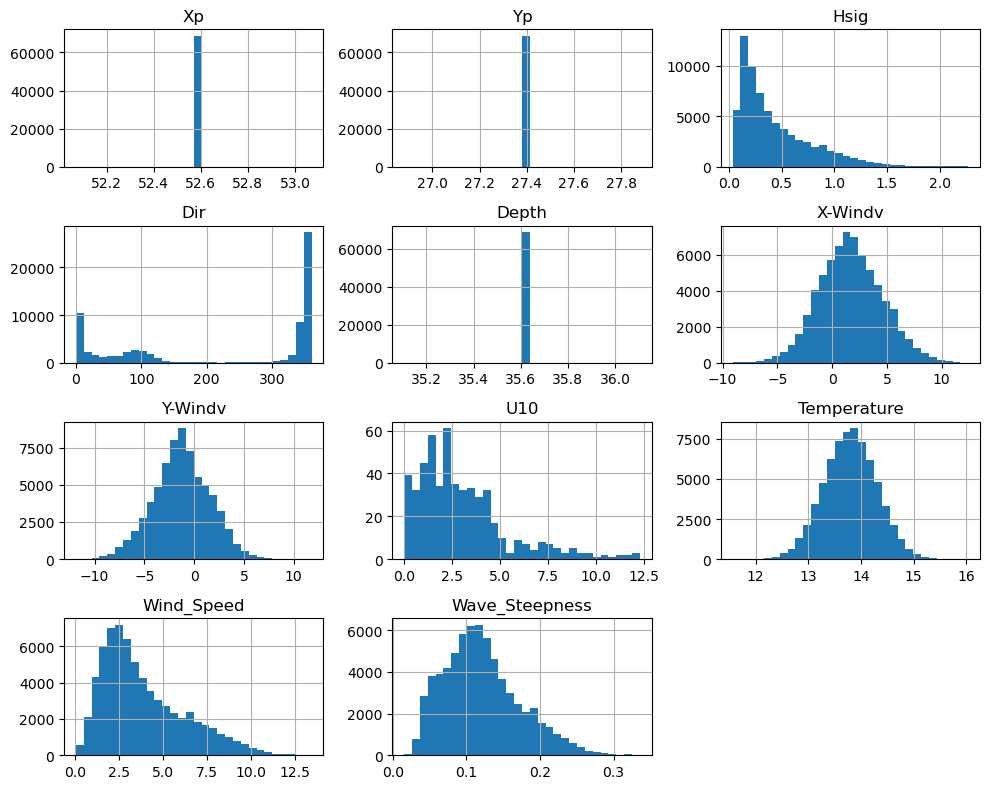

In [122]:
df.hist(bins = 30, figsize = (10,8))
plt.tight_layout()
plt.show()

In [123]:
df.describe()

,Xp,Yp,Hsig,Dir,Depth,X-Windv,Y-Windv,U10,Temperature,Wind_Speed,Wave_Steepness
count,6.875100e+04,68751.00,68751.000000,68751.000000,6.875100e+04,68751.000000,68735.000000,525.000000,68743.000000,68735.000000,68743.000000
mean,5.257000e+01,27.38,0.435445,220.527512,3.560570e+01,1.703416,-1.251427,3.023829,13.797804,3.888802,0.120929
std,2.842192e-14,0.00,0.340019,150.757560,7.105479e-15,2.882313,2.820073,2.381294,0.500145,2.370398,0.051876
min,5.257000e+01,27.38,0.034440,0.000000,3.560570e+01,-9.087300,-11.874300,0.000000,11.564120,0.035977,0.015402
25%,5.257000e+01,27.38,0.174945,63.439000,3.560570e+01,-0.261600,-3.090000,1.320000,13.458812,2.098357,0.083184
50%,5.257000e+01,27.38,0.318160,340.226000,3.560570e+01,1.611500,-1.274900,2.450000,13.799956,3.235125,0.114808
75%,5.257000e+01,27.38,0.608910,353.500500,3.560570e+01,3.600400,0.662450,3.970000,14.136762,5.286641,0.150876
max,5.257000e+01,27.38,2.271350,360.000000,3.560570e+01,12.412800,11.782200,12.290000,16.036464,13.467091,0.335863


Identified negative values in X-Windv and Y-Windv columns. These negative values simply means wind from opposite directions so we will not be removing them

In [124]:
df.isnull().sum()

Xp                       0
Yp                       0
Hsig                     0
Dir                      0
Depth                    0
X-Windv                  0
Y-Windv                 16
U10                  68226
Season                   8
Temperature              8
Wind_Speed              16
Wave_Steepness           8
Wind_Dir_Category        8
dtype: int64

Histogram and df.isnull shows us the constant values as well as the missing values. For this data analysis, I have chosen to drop the Xp Yp, Depth and u10 columns they are not useful to my data interpretation.

In [125]:
df = df.drop(columns =["Xp", "Yp", "U10", "Depth"])
df.head()


,Hsig,Dir,X-Windv,Y-Windv,Season,Temperature,Wind_Speed,Wave_Steepness,Wind_Dir_Category
0,0.03444,353.248,0.3128,-1.7557,Summer,14.045279,1.783347,0.023272,West
1,0.03459,350.817,0.4156,-1.0176,Summer,13.727790,1.099197,0.022787,West
2,0.03479,354.399,0.4148,-1.7209,Summer,14.120766,1.770185,0.025072,West
3,0.03502,348.335,0.1343,-0.3577,Fall,14.558437,0.382081,0.022834,West
4,0.03545,138.355,1.9610,-0.3797,Summer,13.679845,1.997422,0.016984,East


In [126]:
X = df.drop(columns=["Hsig"]) #Features
Y = df["Hsig"] #Target
df.head()

,Hsig,Dir,X-Windv,Y-Windv,Season,Temperature,Wind_Speed,Wave_Steepness,Wind_Dir_Category
0,0.03444,353.248,0.3128,-1.7557,Summer,14.045279,1.783347,0.023272,West
1,0.03459,350.817,0.4156,-1.0176,Summer,13.727790,1.099197,0.022787,West
2,0.03479,354.399,0.4148,-1.7209,Summer,14.120766,1.770185,0.025072,West
3,0.03502,348.335,0.1343,-0.3577,Fall,14.558437,0.382081,0.022834,West
4,0.03545,138.355,1.9610,-0.3797,Summer,13.679845,1.997422,0.016984,East


In [143]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X,Y, test_size = 0.3, random_state = 42)
num = X_train.select_dtypes("float64").columns
cat = X_train.select_dtypes("object").columns

Creating my pipeline to handle all the EDA in one place. This pipeline will handle Imputation ie replacing numerical missing values with mean and categorical missing values with the most frequent. It will also scale by standardizing numerical features, it will transform the colums that are skewed as illustrated by the histogram and then one hot encode the categorical data

In [144]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression, Ridge

In [145]:
#define numerical and categorical columns
#numeric_features = ["X-Windv", "Y-Windv", "Wind_Speed", "Wave_Steepness", "Temperature"]
#categorical_features = ["Season", "Wind_Dir_Category"]

# Preprocessing for numerical features ie handling missing values, and scaling 
numeric_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "mean")),
    ("scaler", StandardScaler())
])

# Preprocessing for categorical fetures ie handling missing values and onehot encoding
categorical_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("one_hot", OneHotEncoder(handle_unknown = "ignore"))
])

# Preprocessing for directional features
def log_function (X):
    return np.log1p(X)

log_custom = FunctionTransformer(log_function, feature_names_out = "one-to-one")
log_transform_col = ["Dir"]

log_transformer = Pipeline(steps = [
    ("log_transform", log_custom)
])


# Combine all into column Transformer
prep_pipe = ColumnTransformer(
    transformers = [
        ("dir", log_transformer, log_transform_col),
        ("num", numeric_transformer, num.difference(log_transform_col)),
        ("cat", categorical_transformer, cat),
        
    ])

# final pipeline
final_pipeline =  Pipeline(steps = [
    ("preprocessor", prep_pipe),
    ("model", LinearRegression())
])

final_pipeline
print(prep_pipe)

ColumnTransformer(transformers=[('dir',
                                 Pipeline(steps=[('log_transform',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function log_function at 0x7f436b027550>))]),
                                 ['Dir']),
                                ('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Temperature', 'Wave_Steepness', 'Wind_Speed', 'X-Windv', 'Y-Windv'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot',
                                            

Using concepts frpom lecture 4 on pipelines:
Automating Preprocessing : pipeline automates and combines all preprocessing steps ensuring modularity and reusability.
Handling Missing Values: Numerical features are imputed with the mean, and categorical features are imputed with the most frequent value.
Scaling and Encoding: Numerical features were standardized while the categorical features were one-hot encoded for compatibility with the regression problem.
Transforming skewed Data: Features like wave_steepness were log-transformed to handle skewness effectively
Unified Preprocessing: All steps were combined using column transformer ensuring a streamlined and reproduceable workflow 

In [146]:
prep_pipe

ColumnTransformer(transformers=[('dir',
                                 Pipeline(steps=[('log_transform',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function log_function at 0x7f436b027550>))]),
                                 ['Dir']),
                                ('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Temperature', 'Wave_Steepness', 'Wind_Speed', 'X-Windv', 'Y-Windv'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['Season', 'Wind_Dir_Category'], dtype='object'))])

In [147]:
X_train_trans = prep_pipe.fit_transform(X_train)
X_test_trans = prep_pipe.transform(X_test)

In [149]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

model = LinearRegression()
model.fit(X_train_trans, Y_train)
Y_predicted = model.predict(X_test_trans)

In [152]:
mse = mean_squared_error (Y_test, Y_predicted)
rmse = np.sqrt (mse)
r2 = r2_score(Y_test, Y_predicted)

print(f"Mean Squared Error: {mse}")
print(f" Root Mean Squared Error: {rmse}")
print(f" R2 Score: {r2}")

Mean Squared Error: 0.016355532298878685
 Root Mean Squared Error: 0.1278887496962836
 R2 Score: 0.8578226462370138


In [158]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100)
cv_results = cross_validate(forest, X_train_trans, Y_train, scoring = "neg_mean_squared_error", cv=10)

print(cv_results['test_score'])
print('mean mse: ',-1*cv_results['test_score'].mean())
print('std mse: ', cv_results['test_score'].std())

[-0.00393446 -0.00380252 -0.00368478 -0.00399379 -0.00378172 -0.00374383
 -0.00396778 -0.00391478 -0.00422315 -0.00395997]
mean mse:  0.0039006774613701556
std mse:  0.0001473149458592735


In [159]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(n_estimators=50, random_state=42)
cv_results = cross_validate(adaboost, X_train_trans, Y_train, scoring = "neg_mean_squared_error", cv=10)

print('mean mse: ',-1*cv_results['test_score'].mean())
print('std dev: ', cv_results['test_score'].std())

mean mse:  0.015481918326090985
std dev:  0.00030502737195342615
